# **Airline reviews scrapping with request and BS**


**In this project, we will scrape Air Arabia reviews from the SKYTRAX website. This data will enable us to analyze customer sentiments towards the airline and identify the key factors that influence their opinions and overall experience.**

In [5]:
from bs4 import BeautifulSoup as bs 
from urllib.request import urlopen
from tqdm import tqdm
import pandas as pd 
import numpy as np
import requests
import pyttsx3

1- **Website Connection and Request Headers**

Before scraping, it is essential to make our requests appear as if they are coming from a regular user rather than a bot. To achieve this, we'll set up the request headers to mimic a real browser. This includes:

- **User-Agent:** Pretend to be a web browser (e.g., Chrome, Firefox).
- **Accept:** Indicate the types of content we can handle.
- **Accept-Language:** Specify our language preference.
- **Referer:** Provide the URL of the previous page to simulate normal navigation flow.

These headers help prevent the website from blocking our requests by disguising our scraping script as a typical user browsing with a standard web browser.

In [6]:
url = 'https://www.airlinequality.com/airline-reviews/air-arabia#google_vignette'

# Set up headers to mimic a real browser
headers = {
    'User -Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://www.google.com/'
}

# Make the request with the headers
response = requests.get(url, headers=headers)

#### **connecting to the website** 

In [7]:
soup = bs(response.content, 'html.parser')

2-  we need to search for div that contains the data we are looking for , we can do this with find_all and the name of the div

In [8]:
container = soup.find_all('article',{'itemprop':'review'})
len(container)

10

*as u can see here we are testing each element using the first container and extarcting the text part* 

In [9]:
# resume
a = container[0].find_all('h2',{'class':'text_header'})
print(a[0].text)

"still waiting for delay compensation"


In [10]:
text_content = container[0].find_all('div',{"class": "text_content"})
text_content[0].text

'✅ Trip Verified |   Terrible service, still waiting for delay compensation 7 months later. My flight was delayed by 5 hours. No staff at Gatwick airport to provide information or refreshments. Terrible service over the phone upon returning. Take weeks/months for a response and still waiting.'

In [11]:
trs = container[0].find_all('table',{'class':'review-ratings'})
len(a)

1

In [12]:
trs

[<table class="review-ratings">
 <tr><td class="review-rating-header type_of_traveller">Type Of Traveller</td><td class="review-value">Solo Leisure</td></tr>
 <tr><td class="review-rating-header cabin_flown">Seat Type</td><td class="review-value">Economy Class</td></tr>
 <tr><td class="review-rating-header route">Route</td><td class="review-value">Gatwick to Tangier</td></tr>
 <tr><td class="review-rating-header date_flown">Date Flown</td><td class="review-value">August 2024</td></tr>
 <tr>
 <td class="review-rating-header seat_comfort">Seat Comfort</td>
 <td class="review-rating-stars stars"><span class="star fill">1</span><span class="star">2</span><span class="star">3</span><span class="star">4</span><span class="star">5</span></td>
 </tr>
 <tr>
 <td class="review-rating-header cabin_staff_service">Cabin Staff Service</td>
 <td class="review-rating-stars stars"><span class="star fill">1</span><span class="star fill">2</span><span class="star fill">3</span><span class="star">4</span>

! [exaple](example.png)

![Another Image](example.png)

## Data scraping approach

**The container we're scraping contains diverse information types:**

1. **Text-based data:**
    - Type of Traveller
    - Seat Type
    - Route
    - Review text
    - Trip verification status

2. **Rating-based data (stars):**
    - Cabin Staff Service
    - Food & Beverages
    - Seat Comfort
    - Value for Money
    - Overall Rating

**Scraping Strategy:**
- Creating a dynamic dictionary with headers as keys
- Handling two types of values:
  - Text content: Direct extraction
  - Star ratings: Count of filled stars (★)
- Storing each review in `review_data` list
- Converting to DataFrame for analysis

**Note:** This approach ensures structured data collection and easy transformation into a pandas DataFrame for subsequent analysis.

In [13]:

review_data = []  
current_review = {}

text_conten = container[0].find_all('div',{"class": "text_content"})
current_review["text_content"]=text_conten[0].text.strip()

resume = container[0].find_all('h2',{'class':'text_header'})
current_review["resume"]=resume[0].text.strip()

if "Trip Verified" in str(current_review):
    current_review["verified"] = True
else:
    current_review["verified"] = False



rows = soup.find_all("tr")
 

for row in rows:
    header = row.find("td", class_="review-rating-header")
    value = row.find("td", class_="review-value")
    stars = row.find("td", class_="review-rating-stars")

    if header:
        key = header.text.strip()

        
        if value:
            current_review[key] = value.text.strip()

        
        elif stars:
            filled_stars = len(stars.find_all("span", class_="star fill"))
            current_review[key] = f"{filled_stars} stars"
        
        
        else:
            current_review[key] = "N/A"

# Once done, store the review data
review_data.append(current_review)

# Output the list of review dictionaries
data = pd.DataFrame(review_data)

# **scraping programme**

**i will use a Tqdm to display the progress bar and a voice assistant to say in which page we are.**

In [14]:
engine = pyttsx3.init()
engine.setProperty('rate', 150)  
engine.setProperty('volume', 0.3)
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[1].id)

In [15]:

def connect(p):
    url = f"https://www.airlinequality.com/airline-reviews/air-arabia/page/{p}/"
    headers = {
        'User -Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Referer': 'https://www.google.com/'
    }

    # Make the request with the headers
    response = requests.get(url, headers=headers)
    soup = bs(response.content, "html.parser")
   
    return soup




In [22]:
pages = 170
review_data = []
for p in tqdm(range(pages),desc=f"processing pages {pages}"):
    connect(p+1)
    engine.say(f'scraping page number {p+1}')
    engine.runAndWait()
    containers = soup.find_all('article',{'itemprop':'review'})

    for i in tqdm(range(len(containers))):  
        current_review = {}

        text_conten = containers[i].find_all('div',{"class": "text_content"})
        current_review["text_content"]=text_conten[0].text.strip()

        resume = containers[i].find_all('h2',{'class':'text_header'})
        current_review["resume"]=resume[0].text.strip()

        if "Trip Verified" in str(current_review):
            current_review["verified"] = True
        else:
            current_review["verified"] = False



        rows = containers[i].find_all("tr")
        
        # Loop through rows and gather data
        for row in rows:
            header = row.find("td", class_="review-rating-header")
            value = row.find("td", class_="review-value")
            stars = row.find("td", class_="review-rating-stars")

            if header:
                key = header.text.strip()

                # Store value if found
                if value:
                    current_review[key] = value.text.strip()

                # Count stars if found
                elif stars:
                    filled_stars = len(stars.find_all("span", class_="star fill"))
                    current_review[key] = f"{filled_stars} stars"
                
                # Default to "N/A" if no value or stars
                else:
                    current_review[key] = "N/A"

        # Once done, store the review data
        review_data.append(current_review)

data = pd.DataFrame(review_data)
data.head(10)
        

processing pages 170: 100%|██████████| 170/170 [11:28<00:00,  4.05s/it]


,text_content,resume,verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,Aircraft
0,"✅ Trip Verified | Terrible service, still wa...","""still waiting for delay compensation""",True,Solo Leisure,Economy Class,Gatwick to Tangier,August 2024,1 stars,3 stars,2 stars,1 stars,1 stars,no,NaN,NaN,NaN
1,Not Verified | I recently had a very disappoin...,“highly restrictive and unfair policy”,False,Solo Leisure,Economy Class,Kathmandu to Abu Dhabi,January 2025,2 stars,2 stars,3 stars,1 stars,1 stars,no,1 stars,2 stars,NaN
2,✅ Trip Verified | Terrible experience with thi...,"""Better off avoiding this airline""",True,Couple Leisure,Economy Class,Athens to Bangkok,January 2025,1 stars,1 stars,1 stars,1 stars,1 stars,no,1 stars,1 stars,A321
3,✅ Trip Verified | The Worst Airline you coul...,"""deduct a hefty 50% of the ticket""",True,Solo Leisure,Economy Class,Sharjah to Kuala Lumpur,January 2025,NaN,NaN,NaN,NaN,1 stars,no,NaN,NaN,NaN
4,Not Verified | Before two years I used to fly ...,“far behind that quality I enjoy”,False,Solo Leisure,Economy Class,Kochi to Abu Dhabi,December 2024,1 stars,3 stars,3 stars,5 stars,3 stars,yes,1 stars,1 stars,A320
5,✅ Trip Verified | Really bad experience. I d...,"2Really bad experience""",True,Solo Leisure,Economy Class,Sharjah to Amman,November 2024,1 stars,2 stars,1 stars,1 stars,1 stars,no,NaN,1 stars,A320
6,Not Verified | I had a terrible experience wi...,"""I had a terrible experience""",False,Family Leisure,Economy Class,Dubai to Tbilisi,June 2024,1 stars,1 stars,1 stars,1 stars,1 stars,no,1 stars,1 stars,A320
7,Not Verified | You can't imagine how bad their...,"""about 5-6 hours delayed""",False,Family Leisure,Economy Class,Chittagong to Milan via Sharjah,July 2024,1 stars,1 stars,1 stars,1 stars,2 stars,no,1 stars,1 stars,NaN
8,Not Verified | Very bad customer service at Tr...,“Poor service”,False,Family Leisure,Economy Class,Thiruvananthapuram to Abha,June 2024,2 stars,1 stars,2 stars,1 stars,1 stars,no,1 stars,1 stars,NaN
9,✅ Trip Verified | I had an incredibly disappo...,"""cancellation policy was frustrating""",True,Solo Leisure,Economy Class,Shiraz to Kuala lumpur via Sharjah,April 2024,NaN,NaN,NaN,NaN,1 stars,no,NaN,NaN,NaN


### **Data Cleaning**

<Axes: >

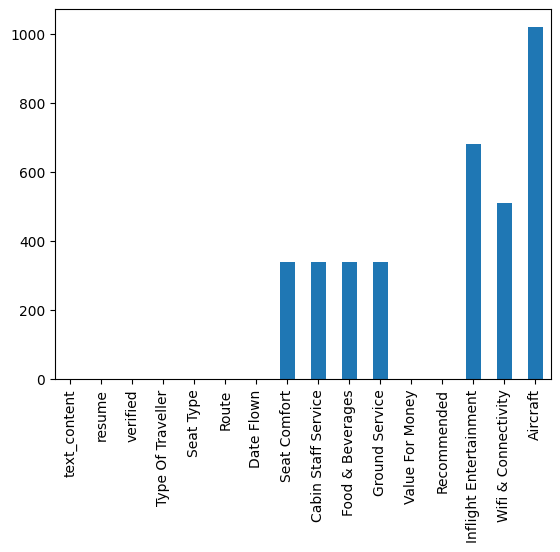

In [23]:
data.isna().sum().plot(kind='bar')

In [26]:
data.shape

(1700, 15)

In [24]:
data.columns

Index(['text_content', 'resume', 'verified', 'Type Of Traveller', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Food & Beverages', 'Ground Service', 'Value For Money', 'Recommended',
       'Inflight Entertainment', 'Wifi & Connectivity', 'Aircraft'],
      dtype='object')

In [82]:
data.drop('Aircraft',axis=1,inplace=True)

KeyError: "['Aircraft'] not found in axis"

In [27]:
data.drop('Inflight Entertainment',axis=1,inplace=True)

In [28]:
data.dropna(axis=0,inplace=True)
data.shape

(1190, 14)

In [29]:
data.head()

,text_content,resume,verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Wifi & Connectivity
1,Not Verified | I recently had a very disappoin...,“highly restrictive and unfair policy”,False,Solo Leisure,Economy Class,Kathmandu to Abu Dhabi,January 2025,2 stars,2 stars,3 stars,1 stars,1 stars,no,2 stars
2,✅ Trip Verified | Terrible experience with thi...,"""Better off avoiding this airline""",True,Couple Leisure,Economy Class,Athens to Bangkok,January 2025,1 stars,1 stars,1 stars,1 stars,1 stars,no,1 stars
4,Not Verified | Before two years I used to fly ...,“far behind that quality I enjoy”,False,Solo Leisure,Economy Class,Kochi to Abu Dhabi,December 2024,1 stars,3 stars,3 stars,5 stars,3 stars,yes,1 stars
5,✅ Trip Verified | Really bad experience. I d...,"2Really bad experience""",True,Solo Leisure,Economy Class,Sharjah to Amman,November 2024,1 stars,2 stars,1 stars,1 stars,1 stars,no,1 stars
6,Not Verified | I had a terrible experience wi...,"""I had a terrible experience""",False,Family Leisure,Economy Class,Dubai to Tbilisi,June 2024,1 stars,1 stars,1 stars,1 stars,1 stars,no,1 stars


In [99]:
ratings_col = [col for col in data.columns if any('stars' in str(val) for val in data[col].unique())]

In [100]:
df = data.copy()

In [101]:
for col in ratings_col :
    df[col] = df[col].str.extract(r'([1-9])')

In [102]:
df.head()

,text_content,resume,verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Wifi & Connectivity
1,Not Verified | I recently had a very disappoin...,“highly restrictive and unfair policy”,False,Solo Leisure,Economy Class,Kathmandu to Abu Dhabi,January 2025,2,2,3,1,1,no,2
2,✅ Trip Verified | Terrible experience with thi...,"""Better off avoiding this airline""",True,Couple Leisure,Economy Class,Athens to Bangkok,January 2025,1,1,1,1,1,no,1
4,Not Verified | Before two years I used to fly ...,“far behind that quality I enjoy”,False,Solo Leisure,Economy Class,Kochi to Abu Dhabi,December 2024,1,3,3,5,3,yes,1
5,✅ Trip Verified | Really bad experience. I d...,"2Really bad experience""",True,Solo Leisure,Economy Class,Sharjah to Amman,November 2024,1,2,1,1,1,no,1
6,Not Verified | I had a terrible experience wi...,"""I had a terrible experience""",False,Family Leisure,Economy Class,Dubai to Tbilisi,June 2024,1,1,1,1,1,no,1


In [103]:
df['Recommended'] = df['Recommended'].apply(lambda x : 0 if x == 'no' else 1)
df.head()

,text_content,resume,verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Wifi & Connectivity
1,Not Verified | I recently had a very disappoin...,“highly restrictive and unfair policy”,False,Solo Leisure,Economy Class,Kathmandu to Abu Dhabi,January 2025,2,2,3,1,1,0,2
2,✅ Trip Verified | Terrible experience with thi...,"""Better off avoiding this airline""",True,Couple Leisure,Economy Class,Athens to Bangkok,January 2025,1,1,1,1,1,0,1
4,Not Verified | Before two years I used to fly ...,“far behind that quality I enjoy”,False,Solo Leisure,Economy Class,Kochi to Abu Dhabi,December 2024,1,3,3,5,3,1,1
5,✅ Trip Verified | Really bad experience. I d...,"2Really bad experience""",True,Solo Leisure,Economy Class,Sharjah to Amman,November 2024,1,2,1,1,1,0,1
6,Not Verified | I had a terrible experience wi...,"""I had a terrible experience""",False,Family Leisure,Economy Class,Dubai to Tbilisi,June 2024,1,1,1,1,1,0,1


### **text cleaning**

In [104]:
df.rename(columns={'text_content':'review','resume':'review_resume'},inplace=True)

In [105]:
df.head()

,review,review_resume,verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Wifi & Connectivity
1,Not Verified | I recently had a very disappoin...,“highly restrictive and unfair policy”,False,Solo Leisure,Economy Class,Kathmandu to Abu Dhabi,January 2025,2,2,3,1,1,0,2
2,✅ Trip Verified | Terrible experience with thi...,"""Better off avoiding this airline""",True,Couple Leisure,Economy Class,Athens to Bangkok,January 2025,1,1,1,1,1,0,1
4,Not Verified | Before two years I used to fly ...,“far behind that quality I enjoy”,False,Solo Leisure,Economy Class,Kochi to Abu Dhabi,December 2024,1,3,3,5,3,1,1
5,✅ Trip Verified | Really bad experience. I d...,"2Really bad experience""",True,Solo Leisure,Economy Class,Sharjah to Amman,November 2024,1,2,1,1,1,0,1
6,Not Verified | I had a terrible experience wi...,"""I had a terrible experience""",False,Family Leisure,Economy Class,Dubai to Tbilisi,June 2024,1,1,1,1,1,0,1


In [106]:
df['review'] = df['review'].str.replace(r'[^A-Za-z\s]', '', regex=True).str.strip()

In [107]:
df['review_resume'] = df['review_resume'].str.replace(r'[^A-Za-z\s]','',regex=True).str.strip()

In [109]:
df['review_resume'] = df['review_resume'].str.lower()
df['review'] = df['review'].str.lower()

In [110]:
df

,review,review_resume,verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Wifi & Connectivity
1,not verified i recently had a very disappoint...,highly restrictive and unfair policy,False,Solo Leisure,Economy Class,Kathmandu to Abu Dhabi,January 2025,2,2,3,1,1,0,2
2,trip verified terrible experience with this a...,better off avoiding this airline,True,Couple Leisure,Economy Class,Athens to Bangkok,January 2025,1,1,1,1,1,0,1
4,not verified before two years i used to fly w...,far behind that quality i enjoy,False,Solo Leisure,Economy Class,Kochi to Abu Dhabi,December 2024,1,3,3,5,3,1,1
5,trip verified really bad experience i dont ...,really bad experience,True,Solo Leisure,Economy Class,Sharjah to Amman,November 2024,1,2,1,1,1,0,1
6,not verified i had a terrible experience wit...,i had a terrible experience,False,Family Leisure,Economy Class,Dubai to Tbilisi,June 2024,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,not verified before two years i used to fly w...,far behind that quality i enjoy,False,Solo Leisure,Economy Class,Kochi to Abu Dhabi,December 2024,1,3,3,5,3,1,1
1695,trip verified really bad experience i dont ...,really bad experience,True,Solo Leisure,Economy Class,Sharjah to Amman,November 2024,1,2,1,1,1,0,1
1696,not verified i had a terrible experience wit...,i had a terrible experience,False,Family Leisure,Economy Class,Dubai to Tbilisi,June 2024,1,1,1,1,1,0,1
1697,not verified you cant imagine how bad their c...,about hours delayed,False,Family Leisure,Economy Class,Chittagong to Milan via Sharjah,July 2024,1,1,1,1,2,0,1


In [119]:
df['year'] = df['Date Flown'].str.split(' ').str[1]
df['Month'] = df['Date Flown'].str.split(' ').str[0]

In [121]:
df.drop('Date Flown',axis=1,inplace=True)

In [122]:
df.head()

,review,review_resume,verified,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Wifi & Connectivity,year,Month
1,not verified i recently had a very disappoint...,highly restrictive and unfair policy,False,Solo Leisure,Economy Class,Kathmandu to Abu Dhabi,2,2,3,1,1,0,2,2025,January
2,trip verified terrible experience with this a...,better off avoiding this airline,True,Couple Leisure,Economy Class,Athens to Bangkok,1,1,1,1,1,0,1,2025,January
4,not verified before two years i used to fly w...,far behind that quality i enjoy,False,Solo Leisure,Economy Class,Kochi to Abu Dhabi,1,3,3,5,3,1,1,2024,December
5,trip verified really bad experience i dont ...,really bad experience,True,Solo Leisure,Economy Class,Sharjah to Amman,1,2,1,1,1,0,1,2024,November
6,not verified i had a terrible experience wit...,i had a terrible experience,False,Family Leisure,Economy Class,Dubai to Tbilisi,1,1,1,1,1,0,1,2024,June


In [124]:
df['year'] = pd.to_datetime(df['year'],format='%Y').dt.strftime('%Y')

In [127]:
df['verified'] = df['verified'].apply(lambda x : 0 if x == False else 1)

In [128]:
df

,review,review_resume,verified,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Wifi & Connectivity,year,Month
1,not verified i recently had a very disappoint...,highly restrictive and unfair policy,0,Solo Leisure,Economy Class,Kathmandu to Abu Dhabi,2,2,3,1,1,0,2,2025,January
2,trip verified terrible experience with this a...,better off avoiding this airline,1,Couple Leisure,Economy Class,Athens to Bangkok,1,1,1,1,1,0,1,2025,January
4,not verified before two years i used to fly w...,far behind that quality i enjoy,0,Solo Leisure,Economy Class,Kochi to Abu Dhabi,1,3,3,5,3,1,1,2024,December
5,trip verified really bad experience i dont ...,really bad experience,1,Solo Leisure,Economy Class,Sharjah to Amman,1,2,1,1,1,0,1,2024,November
6,not verified i had a terrible experience wit...,i had a terrible experience,0,Family Leisure,Economy Class,Dubai to Tbilisi,1,1,1,1,1,0,1,2024,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,not verified before two years i used to fly w...,far behind that quality i enjoy,0,Solo Leisure,Economy Class,Kochi to Abu Dhabi,1,3,3,5,3,1,1,2024,December
1695,trip verified really bad experience i dont ...,really bad experience,1,Solo Leisure,Economy Class,Sharjah to Amman,1,2,1,1,1,0,1,2024,November
1696,not verified i had a terrible experience wit...,i had a terrible experience,0,Family Leisure,Economy Class,Dubai to Tbilisi,1,1,1,1,1,0,1,2024,June
1697,not verified you cant imagine how bad their c...,about hours delayed,0,Family Leisure,Economy Class,Chittagong to Milan via Sharjah,1,1,1,1,2,0,1,2024,July


In [129]:
df.to_csv('df_cleaned.csv')

In [130]:
df.shape

(1190, 15)

In [131]:
df.columns

Index(['review', 'review_resume', 'verified', 'Type Of Traveller', 'Seat Type',
       'Route', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Value For Money', 'Recommended',
       'Wifi & Connectivity', 'year', 'Month'],
      dtype='object')